In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNC

## Data Collection

In [2]:
glass = pd.read_csv("C:/Users/manth/Assignment/KNN/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Exploratory Data Analysis

In [3]:
len(glass.columns)

10

In [4]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


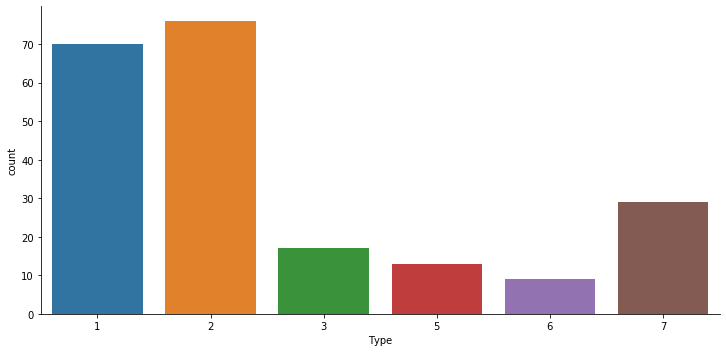

In [5]:
sns.catplot('Type', data=glass, kind="count",height = 5,aspect = 2)

In [6]:
# Train and Test data 
from sklearn.model_selection import train_test_split
train,test = train_test_split(glass,test_size = 0.2) # 0.2 => 20 percent of entire data 

## KNN Algorithm

In [7]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(3,50,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])
    
# print(acc)
# print(len(acc))

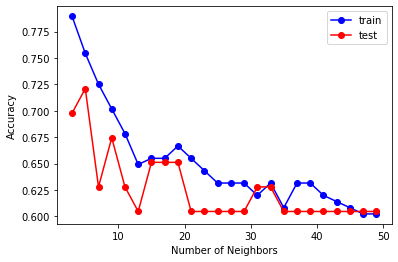

In [8]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"bo-")

# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"ro-")

plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend(["train","test"])
plt.show()

In [9]:
# KNN using sklearn 
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC

# for 3 nearest neighbours 
neigh = KNC(n_neighbors= 3)

# Fitting with training data 
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])

# train accuracy 
train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9]) # 94 %

# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9]) # 100%

print("k=3:-\n","Train Accuracy:",train_acc,"\nTest Accuracy",test_acc)

k=3:-
 Train Accuracy: 0.7894736842105263 
Test Accuracy 0.6976744186046512


In [10]:
# for 5 nearest neighbours 
neigh = KNC(n_neighbors= 5)

# Fitting with training data 
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])

# train accuracy 
train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9]) 

# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9]) 

print("k=5:-\n","Train Accuracy:",train_acc,"\nTest Accuracy",test_acc)

k=5:-
 Train Accuracy: 0.7543859649122807 
Test Accuracy 0.7209302325581395


In [11]:
x_train=train.iloc[:,0:9]
y_train=train.iloc[:,9]

x_test=test.iloc[:,0:9]
y_test=test.iloc[:,9]

In [12]:
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = neigh.predict(x_test)

In [13]:
confusion_matrix(y_test,y_pred)

array([[14,  1,  0,  0,  0,  0],
       [ 4,  7,  0,  0,  0,  0],
       [ 3,  0,  1,  0,  0,  0],
       [ 0,  2,  0,  3,  0,  1],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  5]], dtype=int64)

In [14]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.67      0.93      0.78        15
           2       0.64      0.64      0.64        11
           3       1.00      0.25      0.40         4
           5       1.00      0.50      0.67         6
           6       1.00      1.00      1.00         1
           7       0.83      0.83      0.83         6

    accuracy                           0.72        43
   macro avg       0.86      0.69      0.72        43
weighted avg       0.77      0.72      0.70        43

